<span style="font-family:Futura; font-size:3em; font-weight:light;">PyUltraLight 2.22.1 Standalone </span>


<span style="font-family:Futura; font-size:1.5em; font-weight:light;">What the original version should have been. </span> (R) pending. *

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialization" data-toc-modified-id="Initialization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization</a></span><ul class="toc-item"><li><span><a href="#Graphics" data-toc-modified-id="Graphics-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Graphics</a></span></li></ul></li><li><span><a href="#Getting-Ready" data-toc-modified-id="Getting-Ready-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Getting Ready</a></span><ul class="toc-item"><li><span><a href="#Base-Integrator-Settings" data-toc-modified-id="Base-Integrator-Settings-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Base Integrator Settings</a></span></li><li><span><a href="#Configuring-Soliton" data-toc-modified-id="Configuring-Soliton-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Configuring Soliton</a></span></li><li><span><a href="#Configuring-Particle" data-toc-modified-id="Configuring-Particle-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Configuring Particle</a></span></li><li><span><a href="#Initial-Conditions" data-toc-modified-id="Initial-Conditions-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Initial Conditions</a></span></li></ul></li><li><span><a href="#Compiling-Init-File" data-toc-modified-id="Compiling-Init-File-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Compiling Init File</a></span></li><li><span><a href="#Minimal-Analysis-Suite" data-toc-modified-id="Minimal-Analysis-Suite-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Minimal Analysis Suite</a></span><ul class="toc-item"><li><span><a href="#Loading-and-Conversion" data-toc-modified-id="Loading-and-Conversion-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Loading and Conversion</a></span></li><li><span><a href="#2D-Preview" data-toc-modified-id="2D-Preview-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>2D Preview</a></span></li><li><span><a href="#Energy" data-toc-modified-id="Energy-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Energy</a></span></li><li><span><a href="#2D-Complex-Field-Animation" data-toc-modified-id="2D-Complex-Field-Animation-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>2D Complex Field Animation</a></span></li></ul></li></ul></div>

# Initialization

In [1]:
###### Do not touch
MinVersion = 22

import PyUltraLight2 as PyUL

if (PyUL.S_version < MinVersion):
    raise RuntimeError("You need the latest PyULN!")

PyUL.PyULCredits()

import numpy as np

np.set_printoptions(suppress=True)

import math

import numba
import numexpr as ne
import time
import pyfftw
import os
import sys
import multiprocessing
import numpy

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec
import matplotlib.animation
from matplotlib.offsetbox import AnchoredText

import IPython
from IPython.core.display import clear_output, display, Video

from numpy import sqrt, exp, log, log10, sin, cos, tan, pi

%reload_ext autoreload
%autoreload 2


# Useful Aux Functions
ToCode = PyUL.convert
ToPhys = PyUL.convert_back
CB = PyUL.convert_between

printU = PyUL.printU


Axion Mass (eV).1e-21
PyUL2.Universe: Axion Mass: 1e-21
PyUL2.22.1: (c) 2020 - 2021 Wang., Y. and collaborators. 
Auckland Cosmology Group

Original PyUltraLight Team:
Edwards, F., Kendall, E., Hotchkiss, S. & Easther, R.
arxiv.org/abs/1807.04037
PyUL2.22.1: (c) 2020 - 2021 Wang., Y. and collaborators. 
Auckland Cosmology Group

Original PyUltraLight Team:
Edwards, F., Kendall, E., Hotchkiss, S. & Easther, R.
arxiv.org/abs/1807.04037


## Graphics

In [2]:
plt.style.use('default')

plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams["text.usetex"]= False
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.facecolor'] = 'w'

from matplotlib.colors import LinearSegmentedColormap
Palette = 'magma'
cyccol=['#000000', '#ffffff','#000000']
divcol=['#003262','#005b96','#ffffff','#d5a756','#B51700']
divcols=['#005b96','#ffffff','#d5a756']

CycPalette = LinearSegmentedColormap.from_list('myCyc', cyccol)

DivPalette  = LinearSegmentedColormap.from_list('myDiv', divcol)
DivPaletteS  = LinearSegmentedColormap.from_list('myDiv', divcols)

EFigSize = (20,12)
EFigSizeMono = (20,6)
VideoSize = (8,8)
FPS = 10
DPI = 72

FrameCap = 240 # Maximum Number of Frames to Animate

########################################

# BH Trajectory

Colors = np.array([[209,17,65],[0,177,89],[0,174,219],[243,119,53],[255,196,37]])/255

# NBody
ENStyle = '-'
ENColor = '#ff6c0e' # NBody

EKColor = '#8dd9e7'
EPColor = '#fd8dc8'

# ULDM
EUStyle = '-'
EUColor = '#7f1717' # ULDM

EQColor = '#ccb603' # Kinetic 
ERColor = '#6cc25c' # Self-Interaction
EGColor = '#2c8899' # Particle Potential

# Totals
ETStyle = '-'
ETColor = '#080808'

# Auxiliary 
HelperStyle = 'k.'
EmphColor = 'black'
GeomColor = 'olivedrab'

# Getting Ready

## Base Integrator Settings

In [37]:
resol = 128

length, length_units = 2, 'kpc' #
duration, duration_units = 40, 'Myr' #

start_time = 0. # For solitons only: Pre-evolve the wavefunction phase.

NS = 32

save_format = 'npy' # npy, npz, hdf5

step_factor = 1

save_number = -1


PyUL.DispN(duration,duration_units,length,length_units,resol,step_factor,save_number)

### All supported save options: 
# 3Wfn 3Density 2Density Energy 
# 1Density NBody 3Grav 2Grav DF 
# 2Phase Entropy 1Grav 3GravF 2GravF 1GravF
###

# You can also set it to 'Minimum' to only save all 1D mesh Data.
Save_Options = '2Density 2GravF 2Phase Energy 1Density NBody 1Grav DF Entropy 1GravF'

#This Boolean List is for program's internal use
save_options = PyUL.SaveOptionsDigest(Save_Options)


The required number of ULDM steps is 1009
The actual ULDM steps is 1009


## Configuring Soliton

PyUL2.Load Soliton: 
PyUL2 Loaded original PyUL soliton profiles.


0.010466922029882213

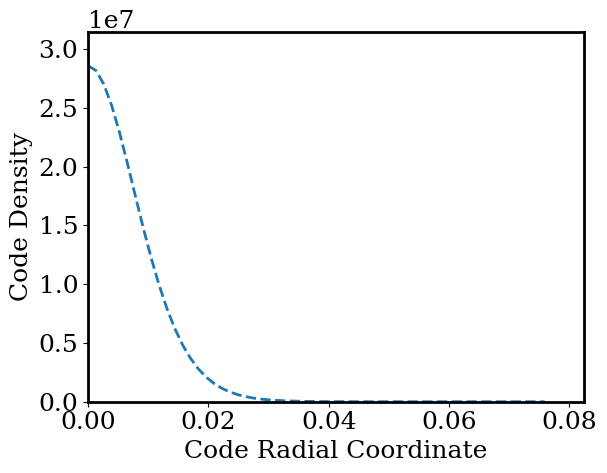

In [38]:
s_mass_unit = 'M_solar_masses'
s_position_unit = length_units
s_velocity_unit = 'km/s' 

m2 = 20 # User Input

Phase = 1 # Multiples of pi

PyUL.SolitonSizeEstimate(m2,length,resol,s_mass_unit,length_units, Plot = True)

## Configuring Particle

In [39]:
# PLUMMER RADIUS (IN LENGTH UNITS)
rP = 0.048

a = PyUL.GenPlummer(rP,length_units)

m1 = 2 # User Input


m_mass_unit = s_mass_unit
m_position_unit = s_position_unit
m_velocity_unit = s_velocity_unit

## Initial Conditions

[[2, [0.11818181818181818, 0.45454545454545453, 0], [0, -9.090909090909092, 0]]]

[[20, [-0.011818181818181818, -0.045454545454545456, 0], [0, 0.9090909090909091, 0], 3.141592653589793]]

[]
kpc
PyUL2.Load Soliton: 
PyUL2 Loaded original PyUL soliton profiles.
69713.86869829126


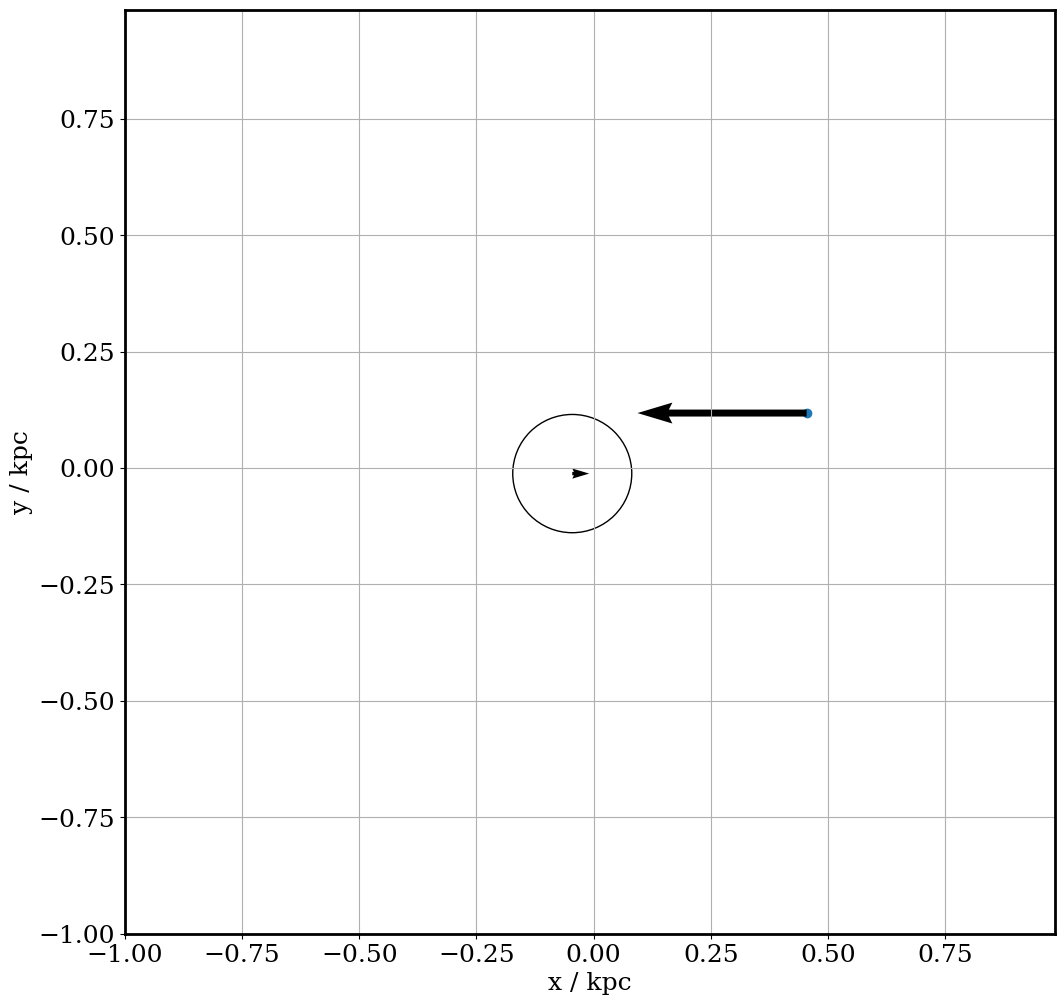

In [40]:
step_factor = 1 # Large number to save sanity.

b = 0.13 # Impact Parameter

vRel0 = 10 # Initial Speed along Collision Axis

Separation = 0.5 # Same unit as position.


#================================================================
# Do not touch

Uniform = False # if True, then there won't be solitons.
Density = 0
UVel = [0,0,0] # Uses s_velocity_units
density_unit = '' # Accepted units: 'MSol/pc3', 'kg/m3', and '' for dimensionless units


# Unit 1
y1 = Separation*m2/(m1+m2)
x1 = b*m2/(m1+m2)
yDot1 = vRel0*m2/(m1+m2)

# Unit 2
y2 = Separation*m1/(m1+m2)
x2 = b*m1/(m1+m2)
yDot2 = vRel0*m1/(m1+m2)

embeds    = []

particles =  [[m1,[x1,y1,0],[0,-yDot1,0]]]
solitons  =  [[m2,[-x2,-y2,0],[0,yDot2,0],Phase*np.pi]]


print(particles,solitons,embeds,sep='\n\n')
plt.show()


fig,ax = PyUL.VizInit2D(length,length_units,resol,embeds,
              solitons,s_position_unit, s_mass_unit,
              particles,m_position_unit, Uniform, Density, density_unit, vRel0*5)

print(PyUL.DensityEstimator(length,length_units,(m1+m2),s_mass_unit))

[**Back to the Top**](#root)
<a id='run'></a>
# Compiling Init File

This creates a timestamped folder using the current settings, and the integrator stores all requested files in it too.

In [41]:
save_path = '2021_Paper1_A'

PyUL.DSManagement(save_path, Force = False)

[ 2021_Paper1_A ] : The current size of the folder is 38.79 Mib
[ 2021_Paper1_A ] : Do You Wish to Delete All Files Currently Stored In This Folder? [Y] 

Y
Folder Cleaned! 

[ 2021_Paper1_A ] : Save Folder Created.


In [42]:
Name = ''

Initpath = ''

run_folder = PyUL.GenerateConfig(NS, length, length_units,
                                 resol, duration, duration_units, step_factor,
                                 save_number, Save_Options, save_path,
                                 save_format, s_mass_unit, s_position_unit,
                                 s_velocity_unit, solitons,start_time,
                                 m_mass_unit, m_position_unit, m_velocity_unit,
                                 particles,embeds, Uniform,Density,density_unit,
                                 a,UVel,False,Name)


PyUL.evolve(save_path,
            run_folder, 
            EdgeClear = False,      # Reflexive Boundary Condition (Half Baked)
            DumpInit = False,       # Dump Initial Wavefunction
            DumpFinal = False,      # Dump Final Wavefunction
            UseInit = False,        # Use Initial Wavefunction (Specify in InitPath)
            IsoP = False,           # Zero Padded Potential
            UseDispSponge = False,  # Dispersive Boundary Condition
            SelfGravity = True,
            NBodyInterp = True,
            NBodyGravity = True,
            Shift = False,          # Shift NBody Location Between Grids (For QW)
            Simpson = False,        # Not Used.
            Silent = False,         # Quiet Mode
            AutoStop = False,       # Stop with BH
            AutoStop2 = False,      # Stop with Gravitational Field Strength
            WellThreshold = 100,    # Stop Condition
            InitPath = '',          # Everything except for the .npy file extension.
            InitWeight = 1,
            Stream = True,          # Write RK Step Results To File
            StreamChar = [1,4])     # Locations in the vectorized TMState to Stream. (x-y flipped).

import IPython
IPython.display.Audio("Done.mp3",autoplay=True)

PyUL2.  FFT: Using 32 CPU Threads for FFT.
PyUL2.22.1: (c) 2020 - 2021 Wang., Y. and collaborators. 
Auckland Cosmology Group

Original PyUltraLight Team:
Edwards, F., Kendall, E., Hotchkiss, S. & Easther, R.
arxiv.org/abs/1807.04037
PyUL2.   IO: Loaded Parameters from ./2021_Paper1_A/20210527_173305@128
PyUL2.   IO: Data to save this run:
2Density Energy 1Density NBody DF 2Phase Entropy 1Grav 2GravF 1GravF 
PyUL2.NBody: Using Linear Interpolation for gravity.
PyUL2.  FFT: Simulation grid resolution is 128^3.
==========================Additional Settings=================================
Particle gravity  ON.
ULDM self-gravity  ON.
NBody response to ULDM  ON.
==========================Stopping Conditions=================================
PyUL2.NBody: Created stream file at root folder for variables {StreamChar}.
PyUL2. Init: Loaded unperturbed soliton.
PyUL2.Load Soliton: 
PyUL2 Loaded original PyUL soliton profiles.
PyUL2.   SP: Poisson Equation Solveed Using FFT.
PyUL2.NBody: Particle 

# Minimal Analysis Suite

## Loading and Conversion

In [43]:
loc = './' + save_path + '/' + run_folder
TimeStamp = run_folder
# Reload Config.. Why don't I use a class?
NS, length, length_units, resol, duration, duration_units, step_factor, save_number, save_options, save_format, s_mass_unit, s_position_unit, s_velocity_unit, solitons,start_time, m_mass_unit, m_position_unit, m_velocity_unit, particles, embeds, Uniform,Density, density_unit ,a, UVel = PyUL.LoadConfig(loc)

if save_number == -1:
    sim_number = PyUL.ULDStepEst(duration,duration_units,
                                          length,length_units,
                                          resol,step_factor, 
                                          save_number = -1)
else:
    sim_number = save_number
    
# Dict of Run Data
EndNum, Loaded = PyUL.Load_npys(loc,save_options, LowMem = False)


Load2D = True
Load1D = True

if Load2D:
    phasedata = Loaded['2Phase']
    #phidata  = Loaded['2Grav']
    phidataF = Loaded['2GravF']
    data = Loaded['2Density']

if Load1D:
    #phi1D  = Loaded['1Grav']
    phiF1D = Loaded['1GravF']
    linedata = Loaded['1Density']

TMdata = Loaded['NBody']
graddata = Loaded['DF']

NBo = len(particles)

ToCode = PyUL.convert
ToPhys = PyUL.convert_back
CB = PyUL.convert_between

# Time
durationMyr = CB(duration,duration_units,'Myr','t')

# Space
lengthKpc = CB(length,length_units,'kpc','l')
lengthC = ToCode(length,length_units,'l')

# Mass

MassList_MSol = []
MassListSI = []
for TM in particles:
    MassList_MSol.append(CB(TM[0],m_mass_unit,'M_solar_masses','m'))
    MassListSI.append(CB(TM[0],m_mass_unit,'kg','m'))
    
# Density
DensitySI = CB(Density,density_unit,'kg/m3','d')
DensityC = ToCode(Density,density_unit,'d')

## Misc. Pre-Multipliers

Tp = np.arange(EndNum)
Tp = Tp * durationMyr / (sim_number+1)

# NBody_State Vector

XPre = ToPhys(1,'kpc','l')
VPre = ToPhys(1,'km/s','v')

XPreSI = ToPhys(1,'m','l')
VPreSI = ToPhys(1,'m/s','v')

IArray = np.arange(len(TMdata[0]))

# Dimensionful NBody State

TMDataS = np.array(TMdata)
TMDataSI = np.array(TMdata)

TMDataS[:,IArray % 6 <= 2] *= XPre
TMDataS[:,IArray % 6 >= 3] *= VPre

TMDataSI[:,IArray % 6 <= 2] *= XPreSI
TMDataSI[:,IArray % 6 >= 3] *= VPreSI

# Rho data

DPre = CB(1,density_unit,'kg/m3','d')

# Energy
EPre = PyUL.energy_unit

# Field Strength
PPre = PyUL.mass_unit / PyUL.length_unit

print('Unit conversion ready!')


print("==============================================")
print(f"PyULN: Axion Mass Used is {PyUL.axion_E} eV.\n")

print(f"\
1 Mass Unit    = {PyUL.mass_unit:.5g} kg = {PyUL.convert_back(1,'solar_masses','m'):.4g} MSol\n\
1 Length Unit  = {PyUL.length_unit:.5g} m  = {PyUL.convert_back(1,'kpc','l'):.4g} kpc\n\
1 Time Unit    = {PyUL.time_unit:.5g} s  = {PyUL.convert_back(1,'Myr','t')/1000:.4g} Gyr\n\n\
1 Density Unit = {PyUL.mass_unit/PyUL.length_unit**3:.5g} kg/m^3 = {PyUL.mass_unit/PyUL.length_unit**3/PyUL.CritDens} Critical Density\n\
1 Speed Unit   = {PyUL.length_unit/PyUL.time_unit:.5g} m/s\n\
1 Energy Unit  = {EPre:.5g} Joules\n")

Loaded = {}

The required number of ULDM steps is 1009
The actual ULDM steps is 1009
PyUL2.LoadNPY: Loaded 1009 Data Entries from ./2021_Paper1_A/20210527_173305@128
Unit conversion ready!
PyULN: Axion Mass Used is 1e-21 eV.

1 Mass Unit    = 1.401e+35 kg = 7.044e+04 MSol
1 Length Unit  = 3.7436e+20 m  = 12.13 kpc
1 Time Unit    = 2.3694e+18 s  = 75.13 Gyr

1 Density Unit = 2.6705e-27 kg/m^3 = 0.31 Critical Density
1 Speed Unit   = 157.99 m/s
1 Energy Unit  = 3.4972e+39 Joules



## 2D Preview

<Figure size 640x480 with 0 Axes>

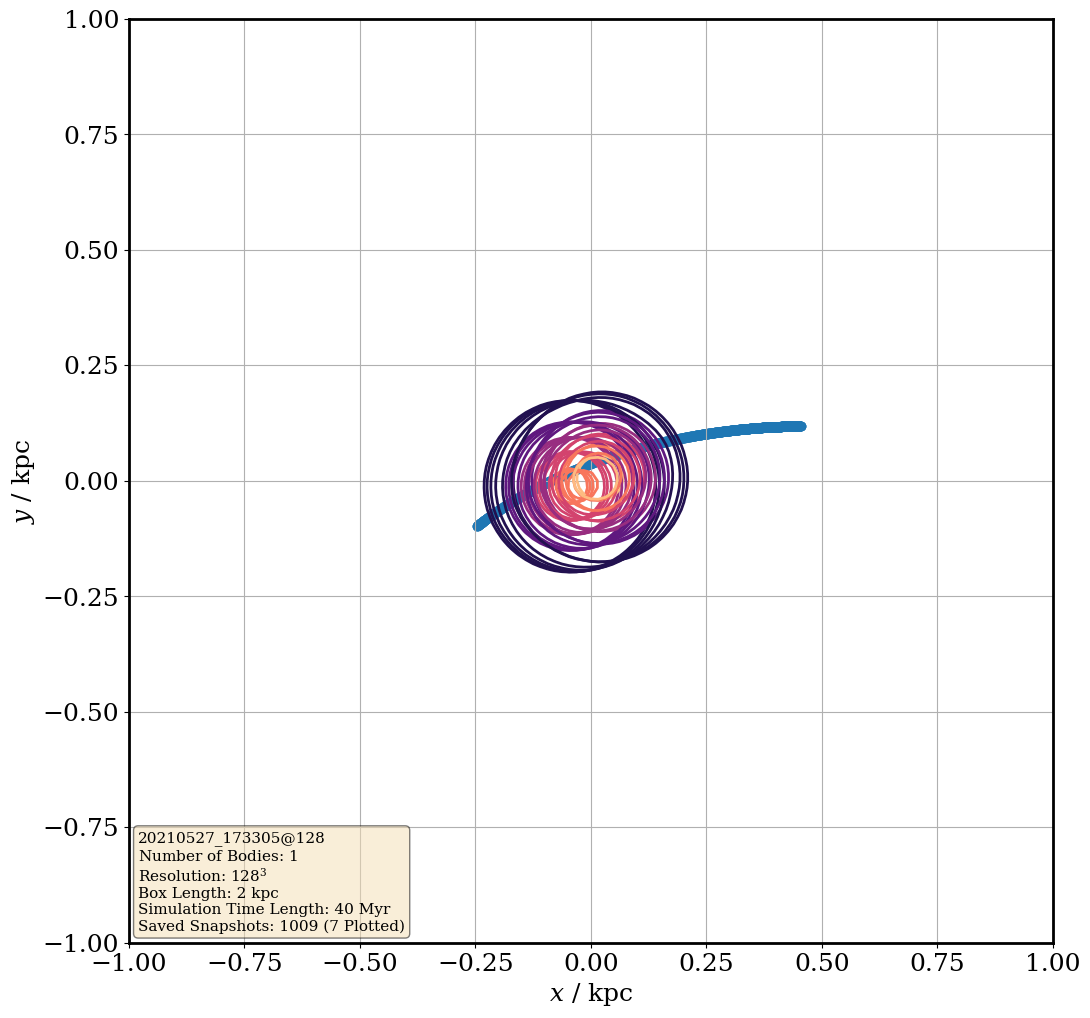

In [44]:
Plot_ULD = True
# Number of ULDM Slices IN BETWEEN start and end (which are always plotted).
NSlices = EndNum//200
Zoom2D = 1

if NSlices >= EndNum:
    
    NSlices = EndNum

try:
    TSD = TimeStamp
except NameError:
    TimeStamp = 'Debug'

plt.clf()

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

Boundary = lengthKpc/(2*Zoom2D)

plt.xlim([-Boundary,Boundary])
plt.ylim([-Boundary,Boundary])

ax.set_aspect('equal', adjustable='box')


TMx = TMDataS[:,1::6]
TMy = TMDataS[:,0::6]

plt.scatter([TMx],[TMy])


if Plot_ULD:
    
    planemax = np.max(data)
    planemin = np.min(data)

    levels = np.linspace(planemin, planemax, int(resol/16))

    PlotRange = np.linspace(-lengthKpc/2, lengthKpc/2,resol,endpoint = False)
    
    plt.contour(PlotRange,PlotRange,data[1], levels=levels,cmap = Palette)
    plt.contour(PlotRange,PlotRange,data[EndNum-1], levels=levels,cmap = Palette)


    if NSlices != 0 and EndNum >= NSlices:

        Blink = EndNum/(NSlices+1)

        Index = np.linspace(Blink,EndNum-Blink,NSlices)

        for Ind in Index:
            j = int(Ind)
            plt.contour(PlotRange,PlotRange,data[j], levels=levels,cmap = Palette)
   
ax.grid(True)

Info = '\n'.join((
    TimeStamp,
    r'Number of Bodies: $%.0f$' % (NBo, ),
    r'Resolution: $%.0f^3$' % (resol, ),
    r'Box Length: %.3g kpc' % (lengthKpc, ),
    r'Simulation Time Length: %.3g Myr' % (durationMyr, ),
    r'Saved Snapshots: %.0f (%.0f Plotted)' % (EndNum,NSlices + 2)
    ))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in bottom left in axes coords
ax.text(0.01, 0.01, Info, transform=ax.transAxes, fontsize=11,
        verticalalignment='bottom', bbox=props)

if Zoom2D != 1:
    
    props2 = dict(boxstyle='round', facecolor='lightgreen', alpha=0.5)

    Zinfo = f"Zoom Level: {Zoom2D}x"
    ax.text(0.82, 0.95, Zinfo, transform=ax.transAxes, fontsize=12,
            verticalalignment='bottom', bbox=props2)
    
ax.set_ylabel('$y$ / kpc')
ax.set_xlabel('$x$ / kpc')

TrajName = '{}{}{}{}{}'.format("./",save_path,"/_",TimeStamp,'.jpg')
plt.savefig(TrajName, format='jpg', dpi=72)

plt.show()

## Energy

PyUL2. NBoE: The dimensionful a is 20.8333(kpc)^(-1)
PyUL2. NBoE: Reconstructing Potential and Kinetic Energies for 1 stored objects.
20210527_173305@128
Number of Bodies: $1$


<Figure size 640x480 with 0 Axes>

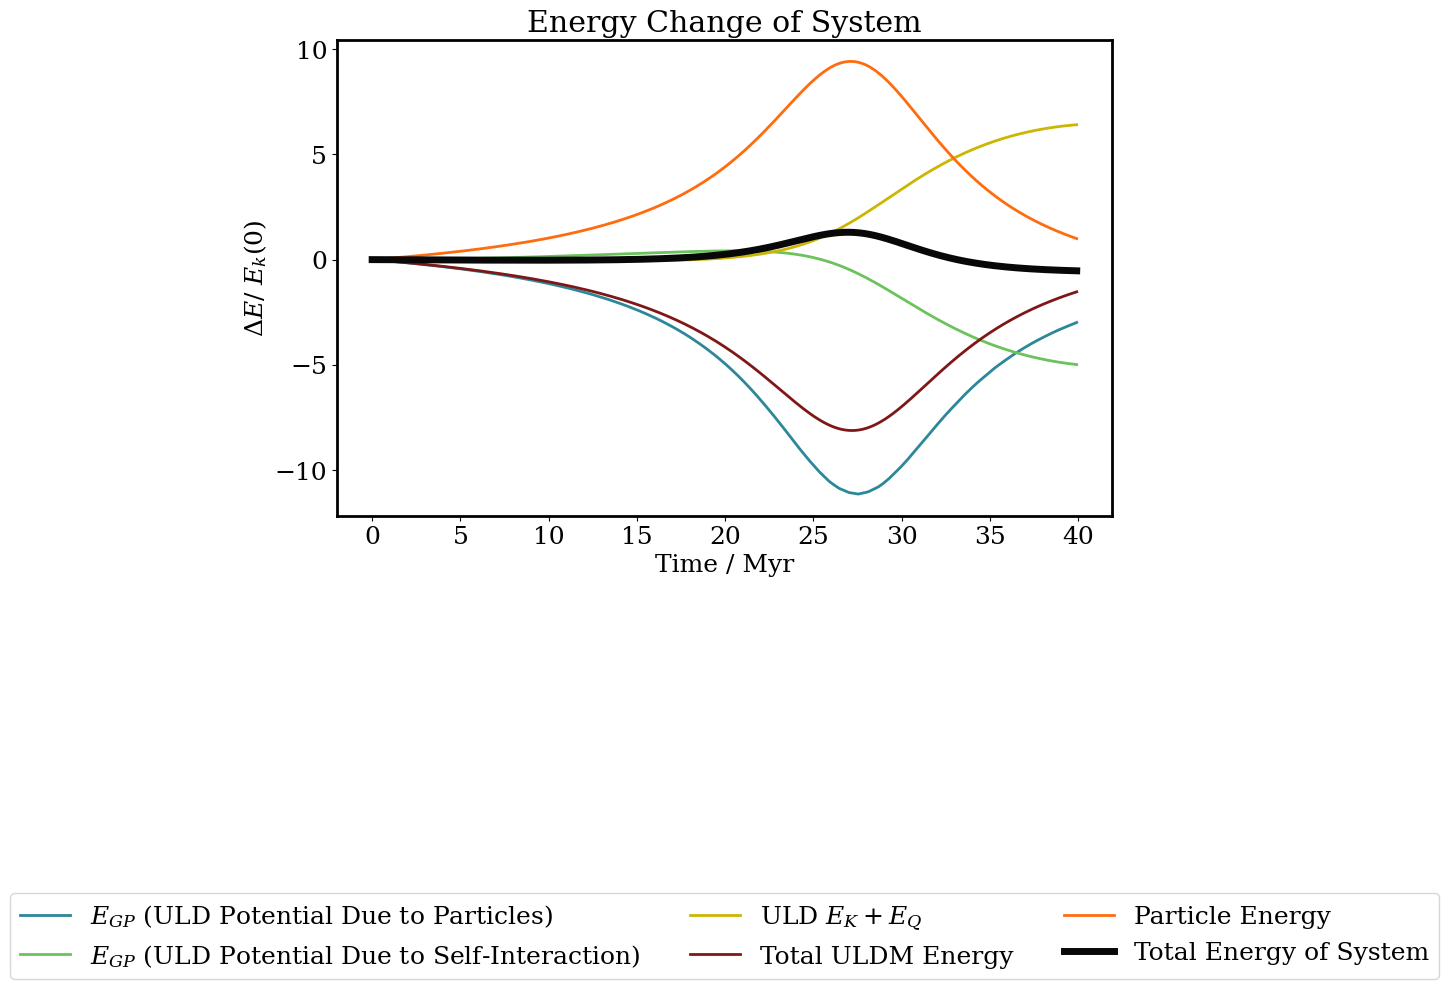

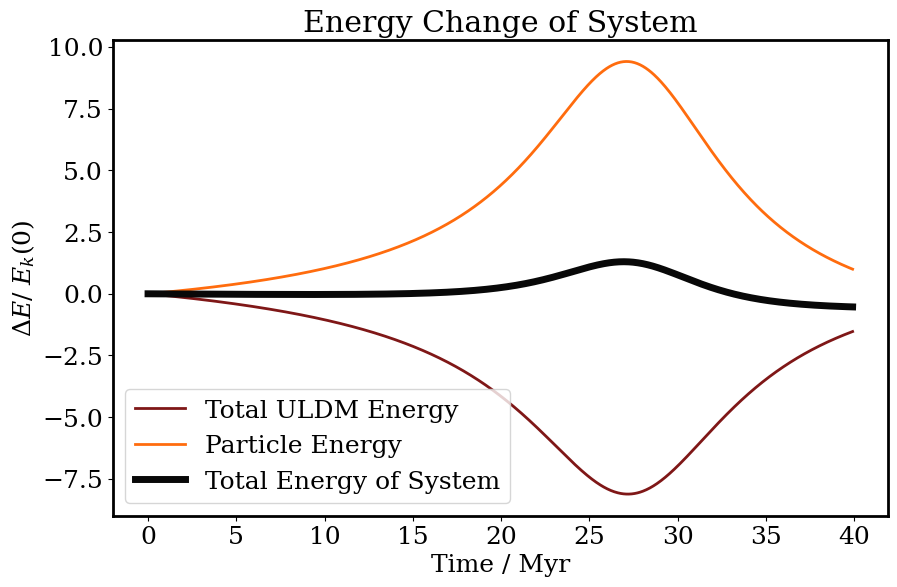

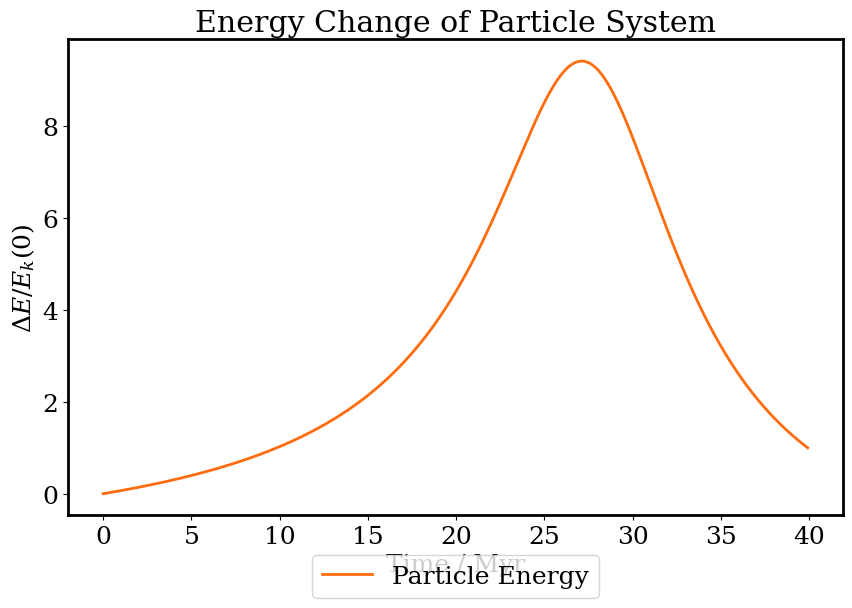

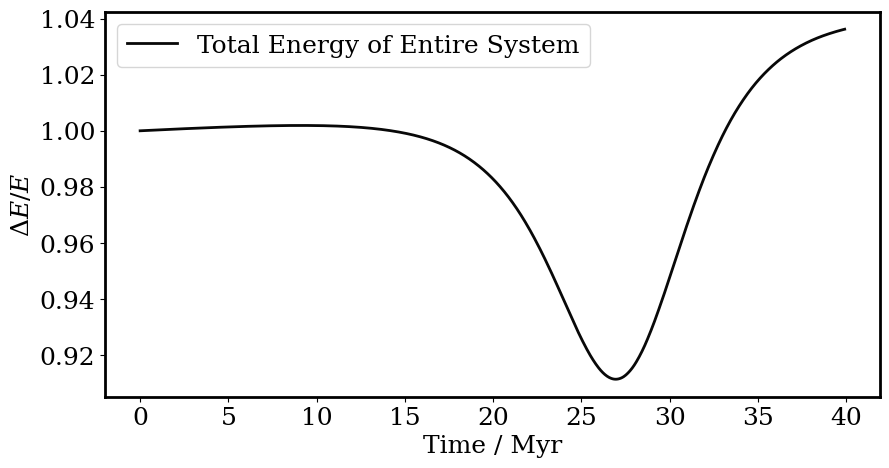

In [49]:
Relative = True # For Dynamical Friction Cases Only

EFigSize = (10,6.18)
EFigSize_Mono = (10,5)

Snap = False
loc = save_path + '/' + run_folder

plt.clf()

#==================================================================================================
## Naming
EnergyName = '{}{}{}'.format("./",loc,"/Energy_Total.jpg")
EnergyNName = '{}{}{}'.format("./",loc,"/Energy_NBody.jpg")
EnergyUName = '{}{}{}'.format("./",loc,"/Energy_UP.jpg")
EnergyDName = '{}{}{}'.format("./",loc,"/Energy_Delta.jpg")
EnergyMName = '{}{}{}'.format("./",loc,"/Energy_Mech.jpg")
EnergyD2Name = '{}{}{}'.format("./",loc,"/Energy_Pct.jpg")

#==================================================================================================
## Analysis
#
# Raw ULDM Energy

# Total Energy from Integrator
egylist = np.load('{}{}'.format(loc, '/Outputs/egylist.npy'),allow_pickle=True) * EPre

# Energy Due to N Body Potential
egpcmlist =  np.load('{}{}'.format(loc, '/Outputs/egpcmMlist.npy'),allow_pickle=True) * EPre # NEW
egpcmlist2 = np.load('{}{}'.format(loc, '/Outputs/egpcmlist.npy'),allow_pickle=True) * EPre # OLD

# Energy Due to ULDM Self-Interaction
egpsilist = np.load('{}{}'.format(loc, '/Outputs/egpsilist.npy'),allow_pickle=True) * EPre

# Energy Due to Quantum Fun
ekandqlist = np.load('{}{}'.format(loc, '/Outputs/ekandqlist.npy'),allow_pickle=True) * EPre

mtotlist = np.load('{}{}'.format(loc, '/Outputs/masseslist.npy'),allow_pickle=True) * EPre

# Uniform Correction Performed in Integrator!

# Reconstruct NBody Energy (Real)
NBo, KS, PS = PyUL.NBodyEnergy(MassListSI,TMDataSI,EndNum, a, length_units)

# Reconstruct NBody Energy (Physical)
# NBo, KS, PS = PyUL.NBodyEnergy(MassListSI,TMDataSI,EndNum)

if Relative:
    K0 = KS[0] #  Need attention
    EUnit = '$E_k(0)$'
    
    if UVel != [0,0,0]:
        
        VRelSI = CB(np.linalg.norm(UVel),s_velocity_unit,'m/s','v')
        
        printU(f'Initial Relative Speed is {VRelSI:.3f} m/s','QW')
        
        K0 = 1/2*MassListSI[0]*(VRelSI)**2

else: 
    K0 = 1
    EUnit = 'J'
# Processed ULDM Energy

MES = (PS + KS)
MESD = PyUL.GetRel(MES)/K0

EKQD = PyUL.GetRel(ekandqlist)/K0
EGPD = PyUL.GetRel(egpsilist)/K0

ECMD = PyUL.GetRel(egpcmlist)/K0
ECOD = PyUL.GetRel(egpcmlist2)/K0

KSD = PyUL.GetRel(KS)/K0
PSD = PyUL.GetRel(PS)/K0

EUOld  = egylist
EUOldD = PyUL.GetRel(EUOld)/K0

EUNew  = egpsilist + ekandqlist + egpcmlist2
EUNewD = PyUL.GetRel(EUNew)/K0

ETOld  = EUOld + MES
ETOldD = PyUL.GetRel(ETOld)/K0

ETNew  = EUNew + MES
ETNewD = PyUL.GetRel(ETNew)/K0


EROld = ETOld / ETOld[0]

ERNew = ETNew / ETNew[0]


#==================================================================================================
## Compile Printing Boxes

SimInfo = '\n'.join((
    TimeStamp,
    r'Resolution: $%.0f^3$' % (resol, ),
    r'Box Length: %.3f kpc' % (lengthKpc, ),
    r'Simulation Time Length: %.3f Myr' % (durationMyr, )
    ))

NBodyInfo = '\n'.join((
    TimeStamp,
    r'Number of Bodies: $%.0f$' % (NBo, ),
    ))

print(NBodyInfo)

##==================================================================================================
### Plots
#==================================================================================================
# Energy Change Diagram
fig = plt.figure(figsize = EFigSize)
ax = fig.add_subplot(111)

ax.plot(Tp,ECMD,EUStyle,color = EGColor,label='$E_{GP}$ (ULD Potential Due to Particles)')
ax.plot(Tp,EGPD,EUStyle,color = ERColor,label='$E_{GP}$ (ULD Potential Due to Self-Interaction)')
ax.plot(Tp,EKQD,EUStyle,color = EQColor,label='ULD $E_{K}+E_{Q}$')

ax.plot(Tp,EUNewD,ETStyle,color = EUColor,label='Total ULDM Energy')

if len(particles) >= 2:
    ax.plot(Tp,KSD,ENStyle,color = EKColor,label = '$\sum E_k$ of Particles')
    ax.plot(Tp,PSD,ENStyle,color = EPColor,label = '$\sum E_p$ of Particles')
    ax.plot(Tp,MESD,ETStyle,color = ENColor,label = 'Total Mechanical Energy of Particles')
else:
    ax.plot(Tp,KSD,ENStyle,color = ENColor,label = 'Particle Energy')
ax.plot(Tp,ETNewD,ETStyle,color = ETColor, label = 'Total Energy of System', lw = 5)
ax.set_ylabel(f'$ΔE / $ {EUnit}')

ax.legend(ncol=3,bbox_to_anchor=(0.5, -1.),loc='lower center')

plt.xlabel('Time / Myr')
plt.title('Energy Change of System')
plt.savefig(EnergyName, format='jpg', dpi=72)

plt.show()


#==================================================================================================
# Energy Change Diagram Distilled
fig = plt.figure(figsize = EFigSize)
ax = fig.add_subplot(111)

ax.plot(Tp,EUNewD,ETStyle,color = EUColor,label='Total ULDM Energy')

if len(particles) >= 2:
    ax.plot(Tp,KSD,ENStyle,color = EKColor,label = '$\sum E_k$ of Particles')
    ax.plot(Tp,PSD,ENStyle,color = EPColor,label = '$\sum E_p$ of Particles')
    ax.plot(Tp,MESD,ETStyle,color = ENColor,label = 'Total Mechanical Energy of Particles')
else:
    ax.plot(Tp,KSD,ENStyle,color = ENColor,label = 'Particle Energy')
ax.plot(Tp,ETNewD,ETStyle,color = ETColor, label = 'Total Energy of System',lw = 5)
ax.set_ylabel(f'$ΔE / $ {EUnit}')

ax.legend(ncol=3,bbox_to_anchor=(0.5, -0.5),loc='lower center')
ax.legend(loc='lower left')

plt.xlabel('Time / Myr')


plt.title('Energy Change of System')
plt.savefig(EnergyDName, format='jpg', dpi=72)

plt.show()

#==================================================================================================
# Energy Change Diagram Distilled Further
fig = plt.figure(figsize = EFigSize)
ax = fig.add_subplot(111)

if len(particles) >= 2:
    ax.plot(Tp,KSD,ENStyle,color = EKColor,label = '$\sum E_k$ of Particles')
    ax.plot(Tp,PSD,ENStyle,color = EPColor,label = '$\sum E_p$ of Particles')
    ax.plot(Tp,MESD,ETStyle,color = ENColor,label = 'Total Mechanical Energy of Particles')
else:
    ax.plot(Tp,KSD,ENStyle,color = ENColor,label = 'Particle Energy')

ax.set_ylabel(f'$ΔE / ${EUnit}')

# ax.plot(Tp, - egpcmlist + egpcmlist[0] ,label = 'ULDM Potential Experienced by Particle')
# ax.plot(Tp, - egpcmlist2 + egpcmlist2[0],label = 'NBody Potential Experienced by ULDM')

ax.legend(ncol=3,bbox_to_anchor=(0.5, -0.2),loc='lower center')

plt.xlabel('Time / Myr')


plt.title('Energy Change of Particle System')
plt.savefig(EnergyNName, format='jpg', dpi=72)

plt.show()
#==================================================================================================
# The Advanced Energy Change Ratio Diagram
fig = plt.figure(figsize= EFigSize_Mono)
ax = fig.add_subplot(111)
#InfoBoxD = AnchoredText(SimInfo, loc=3)
#ax.add_artist(InfoBoxD)

ax.plot(Tp,ERNew,ETStyle, color = ETColor, label = 'Total Energy of Entire System')
ax.set_xlabel('Time / Myr')
ax.legend()

ax.set_ylabel('$ΔE/E$')

plt.savefig(EnergyD2Name, format='jpg', dpi=72)

plt.show()

##==================================================================================================
## The Advanced Energy Change Ratio Diagram 2 
#fig = plt.figure(figsize= EFigSize_Mono)
#ax = fig.add_subplot(111)
#
#ax.plot(Tp,TotalER2,ETStyle, color = ETColor, label = 'Total Energy of Entire System')
#ax.set_xlabel('Time / Myr')
#ax.legend()
#
#ax.set_ylabel('Relative Energy Change (%)')
##ax.set_ylim([90.0,110.0])
#ax.set_title('Percentage Change of System Energy (NEW)')
#
#plt.show()
#
#=================================================================================================

## 2D Complex Field Animation

Saving  2021_Paper1_A/20210527_173305@128/AnimComplex_20210527_173305@128.mp4
[●●●●●●●●●●●●●●●●●●●●●●●●] 100%      Exp. Time: 27/05/2021, 17:39:41 (Prev.: 0.18s) 

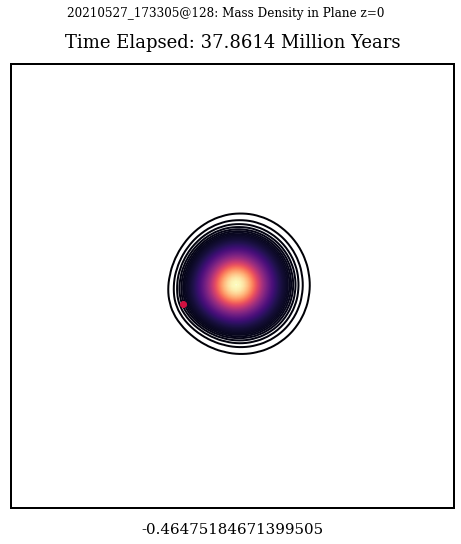

In [50]:
Loga = False 
Relative = False
Phase = False

try:
    VTimeStamp = TimeStamp
except NameError:
    VTimeStamp = str('Debug')


DensityGR = Density

loc = save_path + '/' + TimeStamp

AnimName = '{}{}{}{}'.format(loc,"/AnimComplex_",VTimeStamp,".mp4")

if Loga:
    
    if Relative:
        data0 = np.log(np.real(data)/DensityGR)
        print("Evaluating Change Ratio.")
        planemax = np.max(data0)
        planemin = np.min(data0)
        TITLETEXT = 'Logarithmic Over (Under) density in Plane'

    else:
        data0 = np.log(np.real(data))
        planemax = np.max(data0)
        planemin = -2
        TITLETEXT = 'Logarithmic Mass Density in Plane'
    
    print("Using Log Plot, the Contour Level Limits Are")
    
    
else:
    if Relative:
        data0 = np.real(data)/DensityGR
        print("Initial Field is Uniform. Evaluating Change Ratio.")
        planemax = np.max(data0)
        planemin = np.min(data0)
        TITLETEXT = 'Over (Under) Density in Plane'

    else:
        data0 = np.real(data)
        planemax = np.max(data0)
        planemin = np.min(data0)
        TITLETEXT = 'Mass Density in Plane'

TITLETEXT = VTimeStamp + ': ' + TITLETEXT

print("Saving ",AnimName)

plot_axis = 'z' #axis that is set to zero
plt.ioff()
fig0, ax0 = plt.subplots(figsize=VideoSize, dpi=DPI)
ax0.set_aspect('equal')

PlotRange = np.linspace(-lengthKpc/2, lengthKpc/2,resol,endpoint = False)

# print(PlotRange)

levels = np.linspace(planemin, planemax, int(resol))

# Frame Number Management
if FrameCap > 0 and FrameCap < EndNum:
    Step = EndNum//FrameCap
    MovEnd = FrameCap
else: 
    Step = 1
    MovEnd = EndNum
    
# With out-of-bounds colors:

norm = mpl.colors.BoundaryNorm(boundaries=levels, ncolors=300, extend='both')

def animate3(i):
    I = Step * i
    ts = time.time()
    
    ax0.cla()
    
    ax0.set_aspect('equal')
    ax0.get_xaxis().set_ticks([])
    ax0.get_yaxis().set_ticks([])
    
    ax0.set_xlim([-lengthKpc/2,lengthKpc/2])
    ax0.set_ylim([-lengthKpc/2,lengthKpc/2])
    
    Plane = np.real(phasedata[I])
    if Phase:
        ax0.imshow(Plane,cmap = CycPalette,origin = 'lower',
               vmin = -np.pi, vmax = np.pi,
               extent = (-lengthKpc/2,lengthKpc/2,-lengthKpc/2,lengthKpc/2),
              interpolation = 'none')
    
    TMStateLoc = TMDataS[I,:]
    
    for particleID in range(len(particles)):

        Color = Colors[np.mod(particleID,5)] # 0, 0.5
        
        TMx = TMStateLoc[int(6*particleID+1)]
        TMy = TMStateLoc[int(6*particleID)]
        TMz = TMStateLoc[int(6*particleID+2)]
        
        Vx = TMStateLoc[int(6*particleID+4)]
        Vy = TMStateLoc[int(6*particleID+3)]
        Vz = TMStateLoc[int(6*particleID+5)]
        ax0.plot([TMx],[TMy],'o',color=(Color[0],Color[1],Color[2],1))
        #ax0.quiver([TMx],[TMy],[Vx],[Vy])
        
    ax0.contour(PlotRange,PlotRange,data0[I], levels=levels,cmap = Palette)
    
    #ax0.pcolormesh(PlotRange, PlotRange,data0[I],rasterized = True, norm = norm, cmap = DivPalette)
    
    ax0.text(0.5, 1.05, '{}{:.4f}{}'.format('Time Elapsed: ', Tp[I],' Million Years'),
             horizontalalignment='center', verticalalignment='center', 
             transform=ax0.transAxes,color = EmphColor)
    
    
    ax0.text(0.5, -0.05, f'{ETNewD[I]}',
             horizontalalignment='center', verticalalignment='center', 
             transform=ax0.transAxes,color = EmphColor, fontsize = 15)
    fig0.suptitle('{} {}{}'.format(TITLETEXT, plot_axis, '=0'), fontsize = 12)
    PyUL.prog_bar(MovEnd, i+1, time.time()-ts)


interval = 0.15 #in seconds
ani3 = matplotlib.animation.FuncAnimation(fig0,animate3,MovEnd,interval=interval*1e+3,blit=False)

Writer = matplotlib.animation.writers['ffmpeg']

writer = Writer(fps=FPS, metadata=dict(artist='PyUltraLightF'))

ani3.save(AnimName, writer=writer)

Video(AnimName)

In [33]:
Video(AnimName)